In [1]:
#!pip install catboost

In [2]:
#Экспортируем нужные библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import softplus, relu #???
#import tensorflow as tf
import pickle


In [3]:
#Загружаем  в датафрейм данные первого  файла
df1 = pd.read_excel('X_nup.xlsx')
df1.tail(3)

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
1037        1037                  90     9.800926          72.858286
1038        1038                  90    10.079859          65.519479
1039        1039                  90     9.021043          66.920143

In [4]:
#Загружаем  в датафрейм данные второго  файла
df2 = pd.read_excel('X_bp.xlsx')
df2.tail(3)

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342

In [5]:
#Наименования колонок в датасетах
print(df1.columns)
print(df2.columns)

Index(['Unnamed: 0', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'], dtype='object')
Index(['Unnamed: 0', 'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')


In [6]:
#Объединяем дата-сеты по индексу
df = df1.join(df2, lsuffix='Unnamed: 0', rsuffix='Unnamed: 0', how = 'inner')
df.tail(4)


Unnamed: 0Unnamed: 0  Угол нашивки, град  Шаг нашивки  \
1019                  1019                  90    10.565614   
1020                  1020                  90     4.161154   
1021                  1021                  90     6.313201   
1022                  1022                  90     6.078902   

      Плотность нашивки  Unnamed: 0Unnamed: 0  \
1019          53.750790                  1019   
1020          67.629684                  1020   
1021          58.261074                  1021   
1022          77.434468                  1022   

      Соотношение матрица-наполнитель  Плотность, кг/м3  \
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342

In [7]:
#Разведочный анализ данных
print(df.shape)
df.info()

(1023, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0Unnamed: 0                  1023 non-null   int64  
 1   Угол нашивки, град                    1023 non-null   int64  
 2   Шаг нашивки                           1023 non-null   float64
 3   Плотность нашивки                     1023 non-null   float64
 4   Unnamed: 0Unnamed: 0                  1023 non-null   int64  
 5   Соотношение матрица-наполнитель       1023 non-null   float64
 6   Плотность, кг/м3                      1023 non-null   float64
 7   модуль упругости, ГПа                 1023 non-null   float64
 8   Количество отвердителя, м.%           1023 non-null   float64
 9   Содержание эпоксидных групп,%_2       1023 non-null   float64
 10  Температура вспышки, С_2              1023 non-null   float64
 11  Поверхностн

In [8]:
#В нашем дата сете получилось 1040-1023=17 строк с NaN
#Удалим  эти строки
#Для этого сначала определим индексы этих строк
#na_index = df[df['Плотность, кг/м3'].isna()].index
#Затем удалим по индексу:
#df.drop(index=na_index, axis=0, inplace=True)

In [9]:
#Сбросим индекс
df.reset_index(inplace=True)

In [10]:
df.columns

Index(['index', 'Unnamed: 0Unnamed: 0', 'Угол нашивки, град', 'Шаг нашивки',
       'Плотность нашивки', 'Unnamed: 0Unnamed: 0',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [11]:
#Удалим все старые индексы
df.drop(columns=['index', 'Unnamed: 0Unnamed: 0', 'Unnamed: 0Unnamed: 0'], axis=1, inplace=True)

In [12]:
df.tail(4)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
1019                  90    10.565614          53.750790   
1020                  90     4.161154          67.629684   
1021                  90     6.313201          58.261074   
1022                  90     6.078902          77.434468   

      Соотношение матрица-наполнитель  Плотность, кг/м3  \
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342

In [13]:
df.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [14]:
#Поищем категориальные признаки
for i in df.columns:
    print(str(i), ':\n', df[i].nunique(),)
    print('------------------------')

Угол нашивки, град :
 2
------------------------
Шаг нашивки :
 989
------------------------
Плотность нашивки :
 988
------------------------
Соотношение матрица-наполнитель :
 1014
------------------------
Плотность, кг/м3 :
 1013
------------------------
модуль упругости, ГПа :
 1020
------------------------
Количество отвердителя, м.% :
 1005
------------------------
Содержание эпоксидных групп,%_2 :
 1004
------------------------
Температура вспышки, С_2 :
 1003
------------------------
Поверхностная плотность, г/м2 :
 1004
------------------------
Модуль упругости при растяжении, ГПа :
 1004
------------------------
Прочность при растяжении, МПа :
 1004
------------------------
Потребление смолы, г/м2 :
 1003
------------------------


In [15]:
#Видим, что единственный категориальный признак - это 'Угол нашивки, град :'
#Посмотрим уникальные значения
df['Угол нашивки, град'].unique()

array([ 0, 90], dtype=int64)

In [16]:
#Посчитаем, сколько в датафрейме записей с тем или иным значением категориального признака
df[df['Угол нашивки, град']==0].shape, df[df['Угол нашивки, град']==90].shape

((520, 13), (503, 13))

In [17]:
#Отлично! Практически 50/50.

In [18]:
#Применим One Hot Encoding к категориальному признаку. Сразу удалим "первый" столбик, потому что вся инйормация есть во "втором".
df['Угол нашивки, град'] = df['Угол нашивки, град'].map({0:'Угол нашивки 0 градусов', 90:'Угол нашивки 90 Градусов'})
df = pd.get_dummies(data = df, columns=['Угол нашивки, град'], dtype='int32',drop_first=True)

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


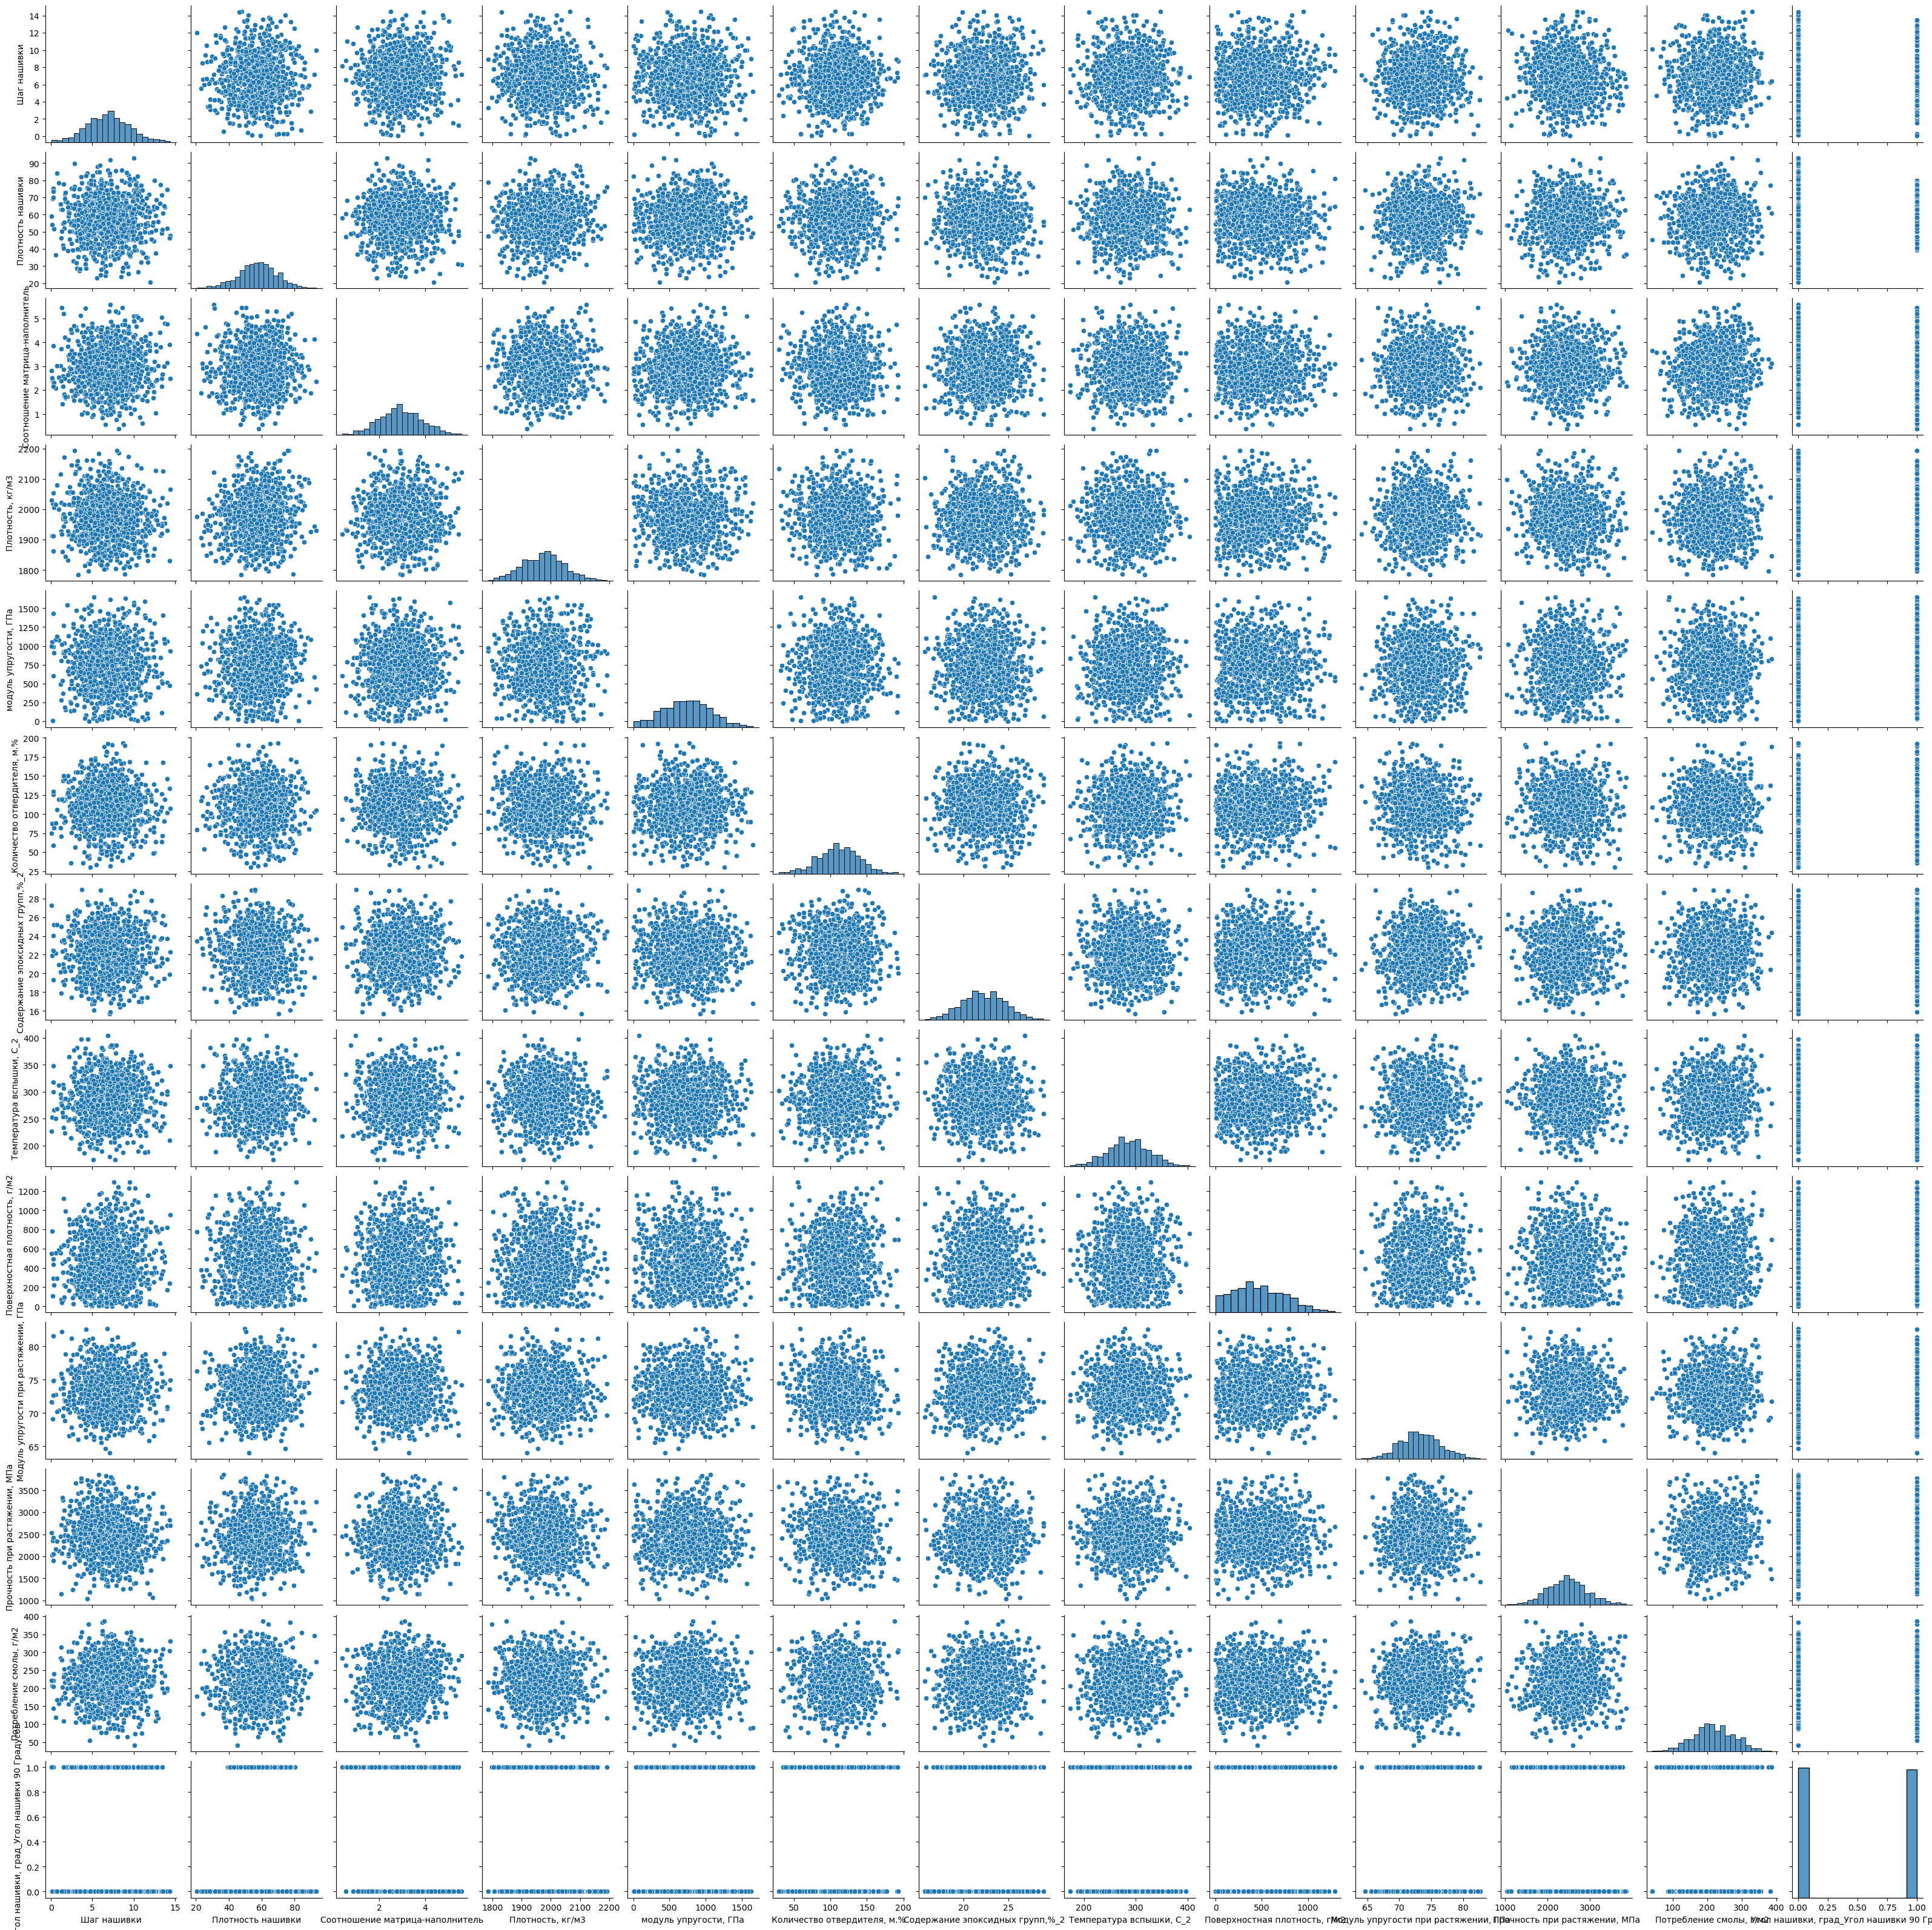

In [163]:
#Посмотрим на распределение и попарную зависимость признаков
sns.pairplot(df)

In [20]:
#Проверим корелляцию между признаками 
#(из матрицы ниже увидим, что корреляции нет)
df.corr()

Шаг нашивки  Плотность нашивки  \
Шаг нашивки                                     1.000000           0.003487   
Плотность нашивки                               0.003487           1.000000   
Соотношение матрица-наполнитель                 0.036437          -0.004652   
Плотность, кг/м3                               -0.061015           0.080304   
модуль упругости, ГПа                          -0.009875           0.056346   
Количество отвердителя, м.%                     0.014887           0.017248   
Содержание эпоксидных групп,%_2                 0.003022          -0.039073   
Температура вспышки, С_2                        0.025795           0.011391   
Поверхностная плотность, г/м2                   0.038332          -0.049923   
Модуль упругости при растяжении, ГПа           -0.029468           0.006476   
Прочность при растяжении, МПа                  -0.059547           0.019604   
Потребление смолы, г/м2                         0.013394           0.012239   
Угол нашивки, град_Угол нашивки 90 Градусов     0.023616           0.107947   

                                             Соотношение матрица-наполнитель  \
Шаг нашивки                                                         0.036437   
Плотность нашивки                                                  -0.004652   
Соотношение матрица-наполнитель                                     1.000000   
Плотность, кг/м3                                                    0.003841   
модуль упругости, ГПа                                               0.031700   
Количество отвердителя, м.%                                        -0.006445   
Содержание эпоксидных групп,%_2                                     0.019766   
Температура вспышки, С_2                                           -0.004776   
Поверхностная плотность, г/м2                                      -0.006272   
Модуль упругости при растяжении, ГПа                               -0.008411   
Прочность при растяжении, МПа                                       0.024148   
Потребление смолы, г/м2                                             0.072531   
Угол нашивки, град_Угол нашивки 90 Градусов                        -0.031073   

                                             Плотность, кг/м3  \
Шаг нашивки                                         -0.061015   
Плотность нашивки                                    0.080304   
Соотношение матрица-наполнитель                      0.003841   
Плотность, кг/м3                                     1.000000   
модуль упругости, ГПа                               -0.009647   
Количество отвердителя, м.%                         -0.035911   
Содержание эпоксидных групп,%_2                     -0.008278   
Температура вспышки, С_2                            -0.020695   
Поверхностная плотность, г/м2                        0.044930   
Модуль упругости при растяжении, ГПа                -0.017602   
Прочность при растяжении, МПа                       -0.069981   
Потребление смолы, г/м2                             -0.015937   
Угол нашивки, град_Угол нашивки 90 Градусов         -0.068474   

                                             модуль упругости, ГПа  \
Шаг нашивки                                              -0.009875   
Плотность нашивки                                         0.056346   
Соотношение матрица-наполнитель                           0.031700   
Плотность, кг/м3                                         -0.009647   
модуль упругости, ГПа                                     1.000000   
Количество отвердителя, м.%                               0.024049   
Содержание эпоксидных групп,%_2                          -0.006804   
Температура вспышки, С_2                                  0.031174   
Поверхностная плотность, г/м2                            -0.005306   
Модуль упругости при растяжении, ГПа                      0.023267   
Прочность при растяжении, МПа                             0.041868   
Потребление смолы, г/м2                                   0.001840

In [21]:
#При беглом просмотре распределений видно, 
#что распределение значений каждого признака имеет форму "колокола" (или отдаленно напоминает её)
#(заметим, что у нормального распределения аналогичная форма распределения) 

In [22]:
#Поищем выбросы
#1) Методом межквартильных расстояний
#2) Методом 3-сигм

In [23]:
df.columns

Index(['Шаг нашивки', 'Плотность нашивки', 'Соотношение матрица-наполнитель',
       'Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
       'Потребление смолы, г/м2',
       'Угол нашивки, град_Угол нашивки 90 Градусов'],
      dtype='object')

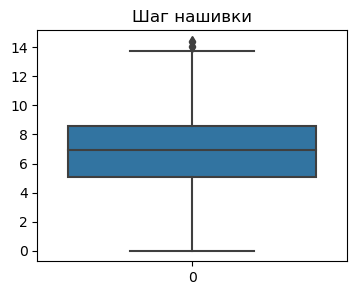

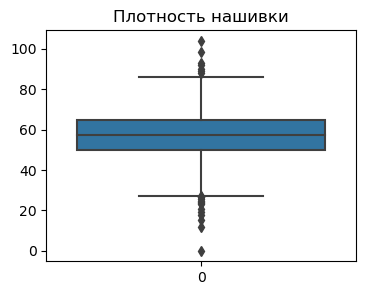

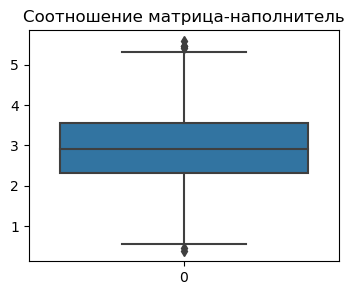

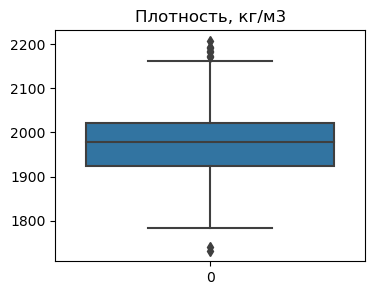

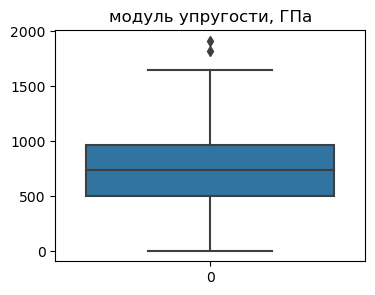

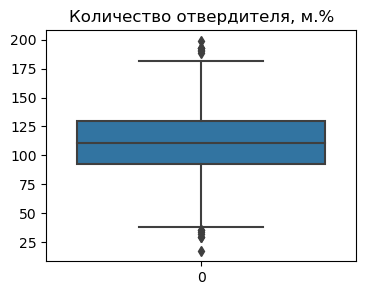

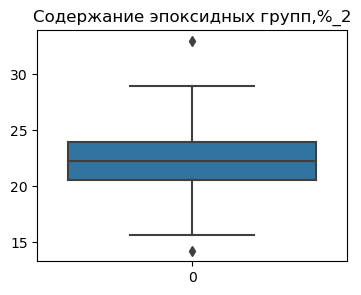

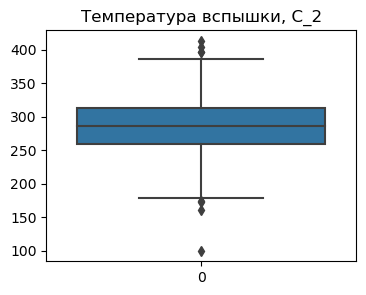

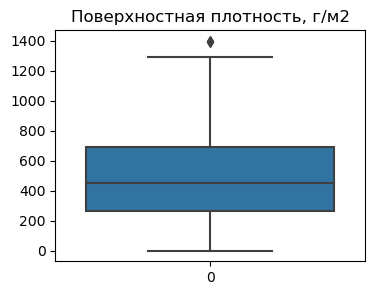

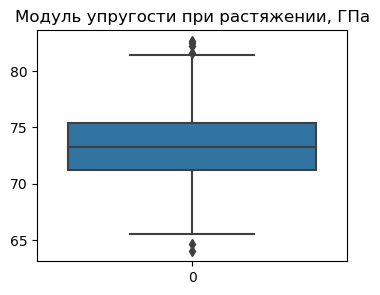

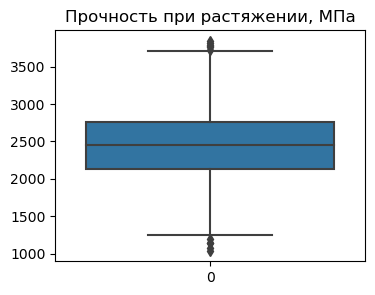

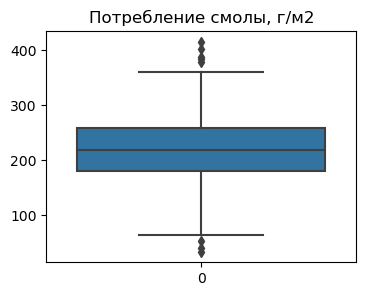

In [24]:
#Визуализация boxplots
for i in df.columns:
    if i == 'Угол нашивки, град_Угол нашивки 90 Градусов':
        continue
    plt.figure(figsize=(4,3))
    sns.boxplot(df[i])
    plt.title(i)

In [25]:
for i in df.columns:
    print('Признак: ', i, '\n',
          'Среднее: ', stat.mean(df[i]),'\n',
          'Дисперсия: ', stat.variance(df[i]), '\n',
          'Ср. кв. откл: ', stat.stdev(df[i]), '\n',
          'Ниж квартиль: ', stat.quantiles(df[i], n=4)[0], '\n',          
          'Верх квартили: ', stat.quantiles(df[i], n=4)[2])
    print('Количество выбросов за пределами интервалов boxplot, рисчитанных как Q1-1.5(Q3-Q1) и Q3+1.5(Q3-Q1):')
    mk = stat.quantiles(df[i], n=4)[2] - stat.quantiles(df[i], n=4)[0]
    top= stat.quantiles(df[i], n=4)[2] + 1.5*mk
    bottom = stat.quantiles(df[i], n=4)[0] - 1.5*mk
    print(df[(df[i]<bottom) | (df[i]>top)].shape[0])
    print('Количество выбросов за пределами диапазона, рисчитанного по правилу 3-Сигма')
    avg = stat.mean(df[i])
    top = avg + 3*stat.stdev(df[i])
    bottom = avg - 3*stat.stdev(df[i])
    print(df[(df[i]<bottom) | (df[i]>top)].shape[0])    
    print('-------------------------')

Признак:  Шаг нашивки 
 Среднее:  6.899222077675017 
 Дисперсия:  6.571363433503512 
 Ср. кв. откл:  2.563467072833882 
 Ниж квартиль:  5.07870831702521 
 Верх квартили:  8.58646329191554
Количество выбросов за пределами интервалов boxplot, рисчитанных как Q1-1.5(Q3-Q1) и Q3+1.5(Q3-Q1):
4
Количество выбросов за пределами диапазона, рисчитанного по правилу 3-Сигма
0
-------------------------
Признак:  Плотность нашивки 
 Среднее:  57.153929432857645 
 Дисперсия:  152.54643026525852 
 Ср. кв. откл:  12.350968798651325 
 Ниж квартиль:  49.7538584337575 
 Верх квартили:  64.9730914181812
Количество выбросов за пределами интервалов boxplot, рисчитанных как Q1-1.5(Q3-Q1) и Q3+1.5(Q3-Q1):
20
Количество выбросов за пределами диапазона, рисчитанного по правилу 3-Сигма
7
-------------------------
Признак:  Соотношение матрица-наполнитель 
 Среднее:  2.9303657734325483 
 Дисперсия:  0.8339748527172307 
 Ср. кв. откл:  0.9132222362148388 
 Ниж квартиль:  2.31660695678294 
 Верх квартили:  3.552901

In [26]:
#Учитывая, что распределение вещественных признаков напоминает по форме нормальное (визуально), 
#а также то, что результаты анализа выбросов дают более щадящие результаты при использовании метода 3-Сигма,
#примем за выбросы те экземпляры, которые выделаются при анализе методом 3-сигма - и удалим их из дата сета.
index_set_to_del=set()
for i in df.columns:
    avg = stat.mean(df[i])
    top = avg + 3*stat.stdev(df[i])
    bottom = avg - 3*stat.stdev(df[i])
    index_set = set(df[(df[i]<bottom) | (df[i]>top)].index.tolist())
    index_set_to_del = index_set_to_del.union(index_set)
print(index_set_to_del)

{0, 257, 770, 2, 140, 461, 718, 464, 592, 19, 211, 918, 279, 791, 412, 100, 41, 873, 298, 692, 438, 503, 378}


In [27]:
df.drop(index=list(index_set_to_del), axis = 0, inplace=True)

In [28]:
df.tail(3)

Шаг нашивки  Плотность нашивки  Соотношение матрица-наполнитель  \
1020     4.161154          67.629684                         3.280604   
1021     6.313201          58.261074                         3.705351   
1022     6.078902          77.434468                         3.808020   

      Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
1020       1972.372865             416.836524                   110.533477   
1021       2066.799773             741.475517                   141.397963   
1022       1890.413468             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град_Угол нашивки 90 Градусов  
1020                                            1  
1021                                            1  
1022                                            1

In [29]:
#Сбросим индекс
df.reset_index(inplace=True)

#Удалим старый индекс
df.drop(columns=['index'], axis=1, inplace=True)


In [30]:
#Разделим признаки и таргет

In [31]:
df.columns

Index(['Шаг нашивки', 'Плотность нашивки', 'Соотношение матрица-наполнитель',
       'Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
       'Потребление смолы, г/м2',
       'Угол нашивки, град_Угол нашивки 90 Градусов'],
      dtype='object')

In [32]:
feature_col = ['Шаг нашивки', 'Плотность нашивки', 'Соотношение матрица-наполнитель',
       'Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Потребление смолы, г/м2',
       'Угол нашивки, град_Угол нашивки 90 Градусов']
y1 = df['Модуль упругости при растяжении, ГПа'].copy()
y2 = df['Прочность при растяжении, МПа'].copy()
X = df[feature_col].copy()

In [33]:
#Выполним нормализацию всех признаков (это приведет к приведению всех значений в диапазон от 0 до 1)

In [34]:
my_mms = MinMaxScaler()
X_norm = my_mms.fit_transform(X)

In [35]:
pickle.dump(my_mms, open('my_mms.pkl', 'bw'))

In [36]:
X_norm.shape

(1000, 11)

In [37]:
df.describe().T

count         mean         std  \
Шаг нашивки                                  1000.0     6.910600    2.557748   
Плотность нашивки                            1000.0    57.276293   11.845791   
Соотношение матрица-наполнитель              1000.0     2.936299    0.908779   
Плотность, кг/м3                             1000.0  1975.402478   72.953703   
модуль упругости, ГПа                        1000.0   738.675486  327.545245   
Количество отвердителя, м.%                  1000.0   110.821904   27.869622   
Содержание эпоксидных групп,%_2              1000.0    22.235549    2.384246   
Температура вспышки, С_2                     1000.0   285.957299   40.231508   
Поверхностная плотность, г/м2                1000.0   479.855825  277.708571   
Модуль упругости при растяжении, ГПа         1000.0    73.318178    3.113817   
Прочность при растяжении, МПа                1000.0  2464.864198  485.015353   
Потребление смолы, г/м2                      1000.0   218.254011   58.944958   
Угол нашивки, град_Угол нашивки 90 Градусов  1000.0     0.496000    0.500234   

                                                     min          25%  \
Шаг нашивки                                     0.037639     5.105814   
Плотность нашивки                              20.571633    49.892983   
Соотношение матрица-наполнитель                 0.389403     2.319283   
Плотность, кг/м3                             1784.482245  1923.628661   
модуль упругости, ГПа                           2.436909   500.772963   
Количество отвердителя, м.%                    29.956150    92.523816   
Содержание эпоксидных групп,%_2                15.695894    20.583191   
Температура вспышки, С_2                      173.484920   259.103839   
Поверхностная плотность, г/м2                   0.603740   266.978731   
Модуль упругости при растяжении, ГПа           64.054061    71.248823   
Прочность при растяжении, МПа                1036.856605  2134.535871   
Потребление смолы, г/м2                        41.048278   179.812213   
Угол нашивки, град_Угол нашивки 90 Градусов     0.000000     0.000000   

                                                     50%          75%  \
Шаг нашивки                                     6.922196     8.588839   
Плотность нашивки                              57.471971    64.930896   
Соотношение матрица-наполнитель                 2.908811     3.553931   
Плотность, кг/м3                             1977.321002  2021.159498   
модуль упругости, ГПа                         741.148111   961.650808   
Количество отвердителя, м.%                   110.652620   129.853101   
Содержание эпоксидных групп,%_2                22.221462    23.974880   
Температура вспышки, С_2                      285.853960   313.029126   
Поверхностная плотность, г/м2                 450.869535   691.528426   
Модуль упругости при растяжении, ГПа           73.230375    75.326573   
Прочность при растяжении, МПа                2456.394188  2760.163022   
Потребление смолы, г/м2                       218.697660   257.474775   
Угол нашивки, град_Угол нашивки 90 Градусов     0.000000     1.000000   

                                                     max  
Шаг нашивки                                    14.440522  
Плотность нашивки                              92.963492  
Соотношение матрица-наполнитель                 5.591742  
Плотность, кг/м3                             2192.738783  
модуль упругости, ГПа                        1649.415706  
Количество отвердителя, м.%                   192.851702  
Содержание эпоксидных групп,%_2                28.955094  
Температура вспышки, С_2                      403.652861  
Поверхностная плотность, г/м2                1291.340115  
Модуль упругости при растяжении, ГПа           82.682051  
Прочность при растяжении, МПа                3848.436732  
Потребление смолы, г/м2                       386.903431  
Угол нашивки, град_Угол нашивки 90 Градусов     1.000000

In [38]:
pd.DataFrame(data=X_norm).describe().T

count      mean       std  min       25%       50%       75%  max
0   1000.0  0.477193  0.177586  0.0  0.351886  0.477999  0.593714  1.0
1   1000.0  0.507027  0.163634  0.0  0.405037  0.509730  0.612766  1.0
2   1000.0  0.489568  0.174687  0.0  0.370964  0.484284  0.608289  1.0
3   1000.0  0.467648  0.178696  0.0  0.340831  0.472347  0.579727  1.0
4   1000.0  0.447024  0.198876  0.0  0.302576  0.448525  0.582408  1.0
5   1000.0  0.496427  0.171089  0.0  0.384097  0.495388  0.613258  1.0
6   1000.0  0.493216  0.179818  0.0  0.368597  0.492154  0.624396  1.0
7   1000.0  0.488654  0.174792  0.0  0.371985  0.488205  0.606271  1.0
8   1000.0  0.371301  0.215155  0.0  0.206374  0.348844  0.535295  1.0
9   1000.0  0.512370  0.170432  0.0  0.401220  0.513653  0.625772  1.0
10  1000.0  0.496000  0.500234  0.0  0.000000  0.000000  1.000000  1.0

In [39]:
#Машинное обучение.

#Так как перед нами стоит задача прогноза вещественного значения "таргета" на основе выборки объектов с различными признаками, 
#то мы решаем задачу регрессии.

#Данную задачу попробуем решить:
#1) с помощью алгоритмов линейной регресси 
# Рассмотрим простую модель первого порядка, а также модель второго порядка.
#2) С помощью алгоритма Ridge
#3) C помощью алгоритма Support Vector Machine (SVM)
#4) C помощью алгоритма KNN
#5) C помощью алгоритма Decision Tree
#6) C помощью алгоритма Boosting (CatBoostRegressor)

# Получив результаты, примем решение о целесообразности использования той или иной модели. 

In [40]:
#Для начала разделим данные на обучающую и тестовую выборку
X_norm_train, X_norm_test, y1_train, y1_test, y2_train, y2_test =train_test_split(X_norm, y1, y2, 
                                                                                  test_size=0.20, 
                                                                                  random_state=42)

In [41]:
X_norm_train.shape, y1_train.shape, y2_train.shape, X_norm_test.shape, y1_test.shape, y2_test.shape

((800, 11), (800,), (800,), (200, 11), (200,), (200,))

In [42]:
#1. Линейная регрессия первого порядка
#Создадим экземпляры класса 
regr1_1 = LinearRegression()
regr1_2 = LinearRegression()

In [43]:
#Обучим регрессор 
regr1_1.fit(X_norm_train, y1_train)
regr1_2.fit(X_norm_train, y2_train)

LinearRegression()

In [44]:
    regr1_1.intercept_, regr1_1.coef_

(72.31255772799932,
 array([-0.58015657,  0.9435601 , -0.37825831, -0.22289103,  0.0420094 ,
        -1.71528808,  1.15411888,  0.73435658,  1.04165055,  1.28794982,
        -0.13494089]))

In [45]:
#СДелаем предсказания на тестовой выборке
y1_pred = regr1_1.predict(X_norm_test)
y2_pred = regr1_2.predict(X_norm_test)

In [46]:
#MSE
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
print('MSE') 
print(mse1) 
print(mse2)
#MAE
mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
print('MAE')
print(mae1) 
print(mae2)
#MAPE
mape1 = mean_absolute_percentage_error(y1_test, y1_pred)
mape2 = mean_absolute_percentage_error(y2_test, y2_pred)
print('MAPE') 
print(mape1) 
print(mape2)

MSE
10.347178801161656
232110.1774665305
MAE
2.5963645793016417
376.56553458004635
MAPE
0.03530497008951447
0.17256210780717154


In [47]:
#Вывод: 
#Линейная реграссия первого порядка достаточно хорошо предстказывает y1 ('Модуль упругости при растяжении, ГПа')
#Но на порядок хуже предсказывает y2 ('Прочность при растяжении, МПа' )

In [48]:
#2. Линейная рекрессия второго порядка
#Для начала выберем и создадим признаки второго порядка при помощи функции PolynomialFeatures
df.columns

Index(['Шаг нашивки', 'Плотность нашивки', 'Соотношение матрица-наполнитель',
       'Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
       'Потребление смолы, г/м2',
       'Угол нашивки, град_Угол нашивки 90 Градусов'],
      dtype='object')

In [49]:
pol_features = ['Шаг нашивки', 'Плотность нашивки', 'Соотношение матрица-наполнитель',
       'Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Потребление смолы, г/м2']


In [50]:
X

Шаг нашивки  Плотность нашивки  Соотношение матрица-наполнитель  \
0       4.000000          60.000000                         1.857143   
1       5.000000          47.000000                         1.857143   
2       5.000000          57.000000                         2.771331   
3       5.000000          60.000000                         2.767918   
4       5.000000          70.000000                         2.569620   
..           ...                ...                              ...   
995     9.076380          47.019770                         2.271346   
996    10.565614          53.750790                         3.444022   
997     4.161154          67.629684                         3.280604   
998     6.313201          58.261074                         3.705351   
999     6.078902          77.434468                         3.808020   

     Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
0         2030.000000             738.736842                    50.000000   
1         2030.000000             738.736842                   129.000000   
2         2030.000000             753.000000                   111.860000   
3         2000.000000             748.000000                   111.860000   
4         1910.000000             807.000000                   111.860000   
..                ...                    ...                          ...   
995       1952.087902             912.855545                    86.992183   
996       2050.089171             444.732634                   145.981978   
997       1972.372865             416.836524                   110.533477   
998       2066.799773             741.475517                   141.397963   
999       1890.413468             417.316232                   129.183416   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                          23.750000                284.615385   
1                          21.250000                300.000000   
2                          22.267857                284.615385   
3                          22.267857                284.615385   
4                          22.267857                284.615385   
..                               ...                       ...   
995                        20.123249                324.774576   
996                        19.599769                254.215401   
997                        23.957502                248.423047   
998                        19.246945                275.779840   
999                        27.474763                300.952708   

     Поверхностная плотность, г/м2  Потребление смолы, г/м2  \
0                       210.000000               220.000000   
1                       210.000000               220.000000   
2                       210.000000               220.000000   
3                       210.000000               220.000000   
4                       210.000000               220.000000   
..                             ...                      ...   
995                     209.198700               125.007669   
996                     350.660830               117.730099   
997                     740.142791               236.606764   
998                     641.468152               197.126067   
999                     758.747882               194.754342   

     Угол нашивки, град_Угол нашивки 90 Градусов  
0                                              0  
1                                              0  
2                                              0  
3                                              0  
4                                              0  
..                                           ...  
995                                            1  
996                                            1  
997                                            1  
998                                            1  
999                                            1  

[1000 rows x 11 columns]

In [51]:
X_norm

array([[0.27510888, 0.54465195, 0.28213084, ..., 0.16223008, 0.51741812,
        0.        ],
       [0.34453943, 0.36507374, 0.28213084, ..., 0.16223008, 0.51741812,
        0.        ],
       [0.34453943, 0.50321082, 0.45785722, ..., 0.16223008, 0.51741812,
        0.        ],
       ...,
       [0.28629789, 0.65004618, 0.55575038, ..., 0.57295902, 0.56543465,
        1.        ],
       [0.43571567, 0.52063093, 0.63739572, ..., 0.49651069, 0.4512808 ,
        1.        ],
       [0.41944815, 0.7854866 , 0.65713085, ..., 0.58737335, 0.44442323,
        1.        ]])

In [52]:
#Для удобства сформируем и выведем словарь, 
#с помощью которго можно будет сопоставить колонки в X_norm (numpy array) и X (pandas data frame)
my_dict = {}
a=[x for x in range(X_norm.shape[1])]
for i in a:
    my_dict[i] = X.columns[i]
my_dict

{0: 'Шаг нашивки',
 1: 'Плотность нашивки',
 2: 'Соотношение матрица-наполнитель',
 3: 'Плотность, кг/м3',
 4: 'модуль упругости, ГПа',
 5: 'Количество отвердителя, м.%',
 6: 'Содержание эпоксидных групп,%_2',
 7: 'Температура вспышки, С_2',
 8: 'Поверхностная плотность, г/м2',
 9: 'Потребление смолы, г/м2',
 10: 'Угол нашивки, град_Угол нашивки 90 Градусов'}

In [53]:
#Выбираем полиномиальные признаки (колонки в X_norm по приведенному выше словарю).
#Получилось удобно: мы можем выбрать колонки с индексами от 0 до 10 (не вкл. 10)

In [54]:
X_norm_pol = X_norm[:, 0:10].copy()
X_norm_cat = X_norm[:, 10:].copy()

In [55]:
#Синтезируем полиномиальные признаки:
pfm = PolynomialFeatures(2, include_bias=False)
X_norm_pol_done = pfm.fit_transform(X_norm_pol)

In [56]:
#СОздаем новую матрицу признаков, включающую и полиномиальные, и категориальные признаки:
X_norm_polinom = np.column_stack((X_norm_pol_done, X_norm_cat))
X_norm_polinom

array([[0.27510888, 0.54465195, 0.28213084, ..., 0.08394078, 0.26772151,
        0.        ],
       [0.34453943, 0.36507374, 0.28213084, ..., 0.08394078, 0.26772151,
        0.        ],
       [0.34453943, 0.50321082, 0.45785722, ..., 0.08394078, 0.26772151,
        0.        ],
       ...,
       [0.28629789, 0.65004618, 0.55575038, ..., 0.32397088, 0.31971634,
        1.        ],
       [0.43571567, 0.52063093, 0.63739572, ..., 0.22406574, 0.20365436,
        1.        ],
       [0.41944815, 0.7854866 , 0.65713085, ..., 0.26104236, 0.19751201,
        1.        ]])

In [57]:
#Небольшая проверка:
X_norm_pol_done.shape, X_norm_cat.shape, X_norm_polinom.shape

((1000, 65), (1000, 1), (1000, 66))

In [58]:
#Разделим данные на обучающую и тестовую выборку
X_norm_polinom_train, X_norm_polinom_test, y1_train, y1_test, y2_train, y2_test =train_test_split(X_norm_polinom, y1, y2, 
                                                                                  test_size=0.20, 
                                                                                  random_state=42)

In [59]:
#Создадим экземпляры класса регрессор
regr2_1 = LinearRegression()
regr2_2 = LinearRegression()
#Обучим регрессор 
regr2_1.fit(X_norm_polinom_train, y1_train)
regr2_2.fit(X_norm_polinom_train, y2_train)
#СДелаем предсказания на тестовой выборке
y1_pred = regr2_1.predict(X_norm_polinom_test)
y2_pred = regr2_2.predict(X_norm_polinom_test)
#MSE
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
print('MSE')
print(mse1) 
print(mse2)
#MAE
mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
print('MAE')
print(mae1) 
print(mae2)
#MAPE
mape1 = mean_absolute_percentage_error(y1_test, y1_pred)
mape2 = mean_absolute_percentage_error(y2_test, y2_pred)
print('MAPE')
print(mape1) 
print(mape2)

MSE
11.753637260980446
246451.20900027163
MAE
2.7369454374620785
392.1856575863895
MAPE
0.0372250848776662
0.1769865349056063


In [60]:
#Вывод:
#Применение линейной реграссии к данным с синтезированныи полиномиальными признаками 2-го порядка не дало значимых улучшений

In [132]:
#3. Линейный регрессор Ridge
#Разделим данные на обучающую и тестовую выборку
X_norm_train, X_norm_test, y1_train, y1_test, y2_train, y2_test =train_test_split(X_norm, y1, y2, 
                                                                                  test_size=0.20, 
                                                                                  random_state=40, shuffle=True)
#Создадим экземпляры класса регрессор
regr3_1 = Ridge(alpha=0.10)
regr3_2 = Ridge(alpha=0.10)
#Обучим регрессор 
regr3_1.fit(X_norm_train, y1_train)
regr3_2.fit(X_norm_train, y2_train)
#СДелаем предсказания на тестовой выборке
y1_pred = regr3_1.predict(X_norm_test)
y2_pred = regr3_2.predict(X_norm_test)
#MSE
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
print('MSE')
print(mse1) 
print(mse2)
#MAE
mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
print('MAE')
print(mae1) 
print(mae2)
#MAPE
mape1 = mean_absolute_percentage_error(y1_test, y1_pred)
mape2 = mean_absolute_percentage_error(y2_test, y2_pred)
print('MAPE')
print(mape1) 
print(mape2)

MSE
9.730997193483462
263391.5602355238
MAE
2.5250399539542996
412.1335801595371
MAPE
0.03443230004468438
0.18561530923515346


In [62]:
#Вывод:
#Применение регрессора Ridge не дало значимых улучшений

In [133]:
#4. Регрессор Support Vector Machine

#Разделим данные на обучающую и тестовую выборку
#НЕ ДЕЛАЕМ. Берем из предыдущей модели. 

#Создадим экземпляры класса регрессор
#regr4_1 = SVR(kernel='poly', degree = 3)
#regr4_2 = SVR(kernel='poly', degree = 3)
regr4_1 = SVR(kernel='rbf', gamma = 'scale')
regr4_2 = SVR(kernel='rbf', gamma = 'scale')
#Обучим регрессор 
regr4_1.fit(X_norm_train, y1_train)
regr4_2.fit(X_norm_train, y2_train)
#СДелаем предсказания на тестовой выборке
y1_pred = regr4_1.predict(X_norm_test)
y2_pred = regr4_2.predict(X_norm_test)
#MSE
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
print('MSE')
print(mse1) 
print(mse2)
#MAE
mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
print('MAE')
print(mae1) 
print(mae2)
#MAPE
mape1 = mean_absolute_percentage_error(y1_test, y1_pred)
mape2 = mean_absolute_percentage_error(y2_test, y2_pred)
print('MAPE')
print(mape1) 
print(mape2)

MSE
10.464302433906903
263337.77994617657
MAE
2.6355368988076653
407.1141613390893
MAPE
0.035911720468813295
0.18344005223883644


In [134]:
#Вывод:
#Применение регрессора Support Vector Machine с гауссовым ядром с радиальной базовой функцией (RBF)
#, а также с полиномиальным ядром 3 порядка не дало значимых улучшений

In [135]:
#5. Регрессор KNN 

#Разделим данные на обучающую и тестовую выборку
#НЕ ДЕЛАЕМ. Берем из предыдущей модели. 

#Создадим экземпляры класса регрессор
#regr5_1 = KNeighborsRegressor(n_neighbors=5)
#regr5_2 = KNeighborsRegressor(n_neighbors=5)
#regr5_1 = KNeighborsRegressor(n_neighbors=9)
#regr5_2 = KNeighborsRegressor(n_neighbors=9)
regr5_1 = KNeighborsRegressor(n_neighbors=13)
regr5_2 = KNeighborsRegressor(n_neighbors=13)
#Обучим регрессор 
regr5_1.fit(X_norm_train, y1_train)
regr5_2.fit(X_norm_train, y2_train)
#СДелаем предсказания на тестовой выборке
y1_pred = regr5_1.predict(X_norm_test)
y2_pred = regr5_2.predict(X_norm_test)
#MSE
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
print('MSE')
print(mse1) 
print(mse2)
#MAE
mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
print('MAE')
print(mae1) 
print(mae2)
#MAPE
mape1 = mean_absolute_percentage_error(y1_test, y1_pred)
mape2 = mean_absolute_percentage_error(y2_test, y2_pred)
print('MAPE')
print(mape1) 
print(mape2)


MSE
11.292917454370677
279628.06477521034
MAE
2.7145679388662747
421.3522772317881
MAPE
0.037097795708015135
0.19096388605774103


In [136]:
#Вывод:
#Применение регрессора KNN с c разным количеством соседей n_neighbors не дало значимых улучшений

In [137]:
#6. Регрессор Decision Tree c разным значением максимальной глубины дерева max_depth

#Разделим данные на обучающую и тестовую выборку
#НЕ ДЕЛАЕМ. Берем из предыдущей модели. 

#Создадим экземпляры класса регрессор
regr6_1 = DecisionTreeRegressor(max_depth=5)
regr6_2 = DecisionTreeRegressor(max_depth=5)

#Обучим регрессор 
regr6_1.fit(X_norm_train, y1_train)
regr6_2.fit(X_norm_train, y2_train)
#СДелаем предсказания на тестовой выборке
y1_pred = regr6_1.predict(X_norm_test)
y2_pred = regr6_2.predict(X_norm_test)
#MSE
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
print('MSE')
print(mse1) 
print(mse2)
#MAE
mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
print('MAE')
print(mae1) 
print(mae2)
#MAPE
mape1 = mean_absolute_percentage_error(y1_test, y1_pred)
mape2 = mean_absolute_percentage_error(y2_test, y2_pred)
print('MAPE')
print(mape1) 
print(mape2)


MSE
11.572033384809394
283950.63222181686
MAE
2.7132946678158993
424.1841706166377
MAPE
0.03699100463365054
0.1921727694495251


In [138]:
#Вывод:
#Применение регрессора Decision Tree c разным значением максимальной глубины дерева max_depth не дало значимых улучшений

In [139]:
#7) Попробуем регрессор Boosting (CatBoostRegressor)

#Разделим данные на обучающую и тестовую выборку
#НЕ ДЕЛАЕМ. Берем из предыдущей модели. 

#Создадим экземпляры класса регрессор
regr7_1 = CatBoostRegressor()
regr7_2 = CatBoostRegressor()

#Обучим регрессор 
regr7_1.fit(X_norm_train, y1_train)
regr7_2.fit(X_norm_train, y2_train)
#СДелаем предсказания на тестовой выборке
y1_pred = regr7_1.predict(X_norm_test)
y2_pred = regr7_2.predict(X_norm_test)
#MSE
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
print('MSE')
print(mse1) 
print(mse2)
#MAE
mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
print('MAE')
print(mae1) 
print(mae2)
#MAPE
mape1 = mean_absolute_percentage_error(y1_test, y1_pred)
mape2 = mean_absolute_percentage_error(y2_test, y2_pred)
print('MAPE')
print(mape1) 
print(mape2)


Learning rate set to 0.039525
0:	learn: 3.0951625	total: 12.5ms	remaining: 12.5s
1:	learn: 3.0872694	total: 14.3ms	remaining: 7.15s
2:	learn: 3.0800659	total: 16.1ms	remaining: 5.34s
3:	learn: 3.0755154	total: 17.8ms	remaining: 4.43s
4:	learn: 3.0693067	total: 19.6ms	remaining: 3.9s
5:	learn: 3.0618166	total: 21.8ms	remaining: 3.61s
6:	learn: 3.0567087	total: 24.1ms	remaining: 3.42s
7:	learn: 3.0503883	total: 25.8ms	remaining: 3.2s
8:	learn: 3.0431988	total: 27.5ms	remaining: 3.03s
9:	learn: 3.0396178	total: 29.4ms	remaining: 2.91s
10:	learn: 3.0362201	total: 32.4ms	remaining: 2.92s
11:	learn: 3.0319393	total: 34.3ms	remaining: 2.82s
12:	learn: 3.0267378	total: 36.4ms	remaining: 2.76s
13:	learn: 3.0186765	total: 38.5ms	remaining: 2.71s
14:	learn: 3.0124467	total: 40.2ms	remaining: 2.64s
15:	learn: 3.0046396	total: 41.7ms	remaining: 2.57s
16:	learn: 2.9978035	total: 43.4ms	remaining: 2.51s
17:	learn: 2.9892753	total: 45.1ms	remaining: 2.46s
18:	learn: 2.9822891	total: 46.8ms	remaining: 

In [70]:
#Вывод:
#Применение регрессора CatBoostRegressor не дало значимых улучшений

In [71]:
#Общий вывод по применению регрессоров:
#Для данной выборки нам не удалось значительно оптимизировать результат регрессии, используя различные типы регрессоров. 
#Оптимальным представляется применение одного из линейных регрессоров в связи
#со сравнительно высоким быстродействием и сравнительно невысокими системными требованями таких регрессоров.

In [72]:
#2.Написать нейронную сеть, которая будет рекомендовать


In [73]:
#Разделим данные на обучающую и тестовую выборку
#НЕ ДЕЛАЕМ. Берем из предыдущей модели.

#X_norm_train, X_norm_test, y1_train, y1_test, y2_train, y2_test =train_test_split(X_norm, y1, y2, 
#                                                                                  test_size=0.20, 
#                                                                                  random_state=44)

In [140]:
y1_train_v2 =  y1_train.to_numpy().reshape(-1,1) 
y1_test_v2 =  y1_test.to_numpy().reshape(-1,1)
y2_train_v2 = y2_train.to_numpy().reshape(-1,1)
y2_test_v2 = y2_test.to_numpy().reshape(-1,1)

In [141]:
y1_train_v2.shape,y1_test_v2.shape,y2_train_v2.shape,y2_test_v2.shape

((800, 1), (200, 1), (800, 1), (200, 1))

In [142]:
#Создадим экземпляры класса регрессор
regr8_1 = Sequential([
    Input(shape=(11,)),
    Dense(16,  activation = 'relu'),
    Dense(8,  activation = 'relu'),
    Dense(1,  activation = 'relu')
])
regr8_2 = Sequential([
    Input(shape=(11,)),
    Dense(16,  activation = 'relu'),
    Dense(8,  activation = 'relu'),
    Dense(1,  activation = 'relu')
])

#Скомпилируем созданные модели:
regr8_1.compile(optimizer='Adam', 
                loss = 'mean_squared_error', metrics=['mean_absolute_percentage_error'])
regr8_2.compile(optimizer='Adam', 
                loss = 'mean_squared_error', metrics=['mean_absolute_percentage_error'])

#Обучим модели:
history1 = regr8_1.fit(X_norm_train, y1_train_v2, epochs=100, batch_size = 10, validation_data=(X_norm_test, y1_test_v2))
history2 = regr8_2.fit(X_norm_train, y2_train_v2, epochs=20, batch_size = 10, validation_data=(X_norm_test, y2_test_v2))



Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5313.6812 - mean_absolute_percentage_error: 99.2710 - val_loss: 5004.8379 - val_mean_absolute_percentage_error: 96.2430
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4737.0840 - mean_absolute_percentage_error: 93.7220 - val_loss: 3625.6543 - val_mean_absolute_percentage_error: 81.8368
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3098.4519 - mean_absolute_percentage_error: 75.4982 - val_loss: 1446.6487 - val_mean_absolute_percentage_error: 51.2225
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1034.7061 - mean_absolute_percentage_error: 42.2864 - val_loss: 194.0649 - val_mean_absolute_percentage_error: 16.2619
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148.2698 - mean_absolute_percentage_error: 13.4541 - val_loss: 83.7814 - val_mean_absolute_percentage_error: 10.0051
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.9657 - mean_absolute_percentage_error: 10.3399 

In [166]:
regr8_1.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
regr8_2.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                     │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,013 (3.96 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 676 (2.64 KB)

In [143]:
history1.history['mean_absolute_percentage_error'], history1.history['val_mean_absolute_percentage_error']

([98.51029205322266,
  90.43014526367188,
  68.4100570678711,
  33.27750778198242,
  12.020899772644043,
  10.455965995788574,
  10.227264404296875,
  10.00601577758789,
  9.807025909423828,
  9.61436653137207,
  9.429991722106934,
  9.290933609008789,
  9.138996124267578,
  9.020201683044434,
  8.90300178527832,
  8.796124458312988,
  8.698832511901855,
  8.551497459411621,
  8.476950645446777,
  8.390776634216309,
  8.352659225463867,
  8.23819637298584,
  8.142346382141113,
  8.060013771057129,
  8.011894226074219,
  7.9601006507873535,
  7.890659809112549,
  7.791750431060791,
  7.715731620788574,
  7.663873672485352,
  7.593895435333252,
  7.493525981903076,
  7.456517219543457,
  7.360250949859619,
  7.284685134887695,
  7.204291820526123,
  7.102583408355713,
  7.060272693634033,
  7.027472496032715,
  6.880711555480957,
  6.81505012512207,
  6.734035015106201,
  6.614547252655029,
  6.565523147583008,
  6.484896659851074,
  6.385861396789551,
  6.275094032287598,
  6.1873140335

In [164]:
history2.history['mean_absolute_percentage_error'], history2.history['val_mean_absolute_percentage_error']

([99.9612045288086,
  99.75910949707031,
  99.24351501464844,
  98.23478698730469,
  96.55039978027344,
  93.93143463134766,
  90.28157043457031,
  85.41490936279297,
  79.44346618652344,
  72.4257583618164,
  64.35968780517578,
  55.705894470214844,
  46.782470703125,
  38.29655456542969,
  30.896350860595703,
  25.529260635375977,
  22.058942794799805,
  20.16541290283203,
  19.341228485107422,
  19.138521194458008],
 [99.89262390136719,
  99.54519653320312,
  98.7802734375,
  97.4140625,
  95.2199935913086,
  91.9500961303711,
  87.5270004272461,
  81.90099334716797,
  75.1103744506836,
  67.29081726074219,
  58.544734954833984,
  49.5958137512207,
  40.73627853393555,
  32.604801177978516,
  26.511167526245117,
  22.536169052124023,
  20.714982986450195,
  20.177715301513672,
  20.311922073364258,
  20.590133666992188])

<function matplotlib.pyplot.show(close=None, block=None)>

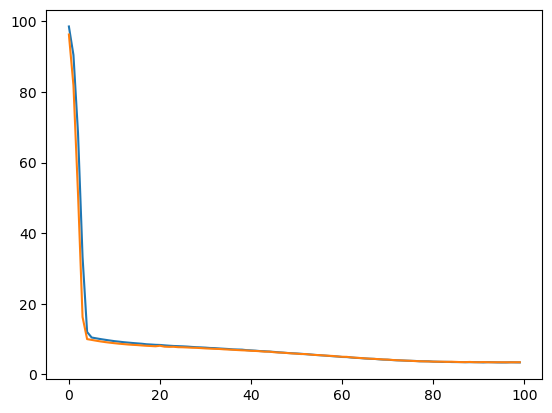

In [144]:

plt.plot(history1.history['mean_absolute_percentage_error'])
plt.plot(history1.history['val_mean_absolute_percentage_error'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

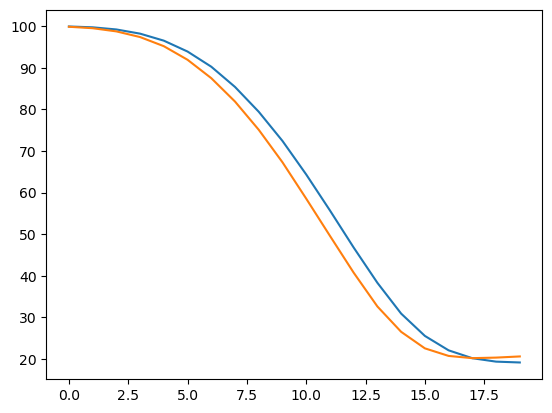

In [145]:
plt.plot(history2.history['mean_absolute_percentage_error'])
plt.plot(history2.history['val_mean_absolute_percentage_error'])
plt.show

In [146]:
#Выполним предсказания на тестовой выборке и расчитаем метрики

y_pred1 = regr8_1.predict(X_norm_test)
print(mean_absolute_percentage_error(y_pred1, y1_test_v2), mean_absolute_error(y_pred1, y1_test_v2))

y_pred2 = regr8_2.predict(X_norm_test)
print(mean_absolute_percentage_error(y_pred2, y2_test_v2), mean_absolute_error(y_pred2, y2_test_v2))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
0.03488617797756408 2.5467018499358605
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
0.2086540207600547 477.0868133853071


In [147]:
#Вывод:
#Видим, что использование двухслойной полносвязной нейросети не привело к улучшению результатов регрессии.
#В ходе исследования нейросети применялись разное количество нейронов в слоях (от 8 до 64) - результат в работе не приведён. 
#Увеличение количества слоев не принесло улучшений.
#Также экспериментально установено, что:
#- только при использвовании всей выборки модели доходят до макимальной точности.
#- уменьшение количества эпох при одинаковом размере батча приводит к снижению точности.
#- уменьшение количества эпох при увеличении размера батча также приводит к снижению точности.

In [148]:
# Для создания приложения выбираем модели нинейной регрессии первого порядка: 
# regr1_1 и regr1_2,
# так как применение других моделей не дало значительных улучшений пригнозирования
#Сохраним модели с помощью инструментов библиотеки pickle:
pickle.dump(regr1_1, open('regr1_1_model.pkl','wb'))
pickle.dump(regr1_2, open('regr1_2_model.pkl','wb'))

In [149]:
## Тестовое открытие модели (объекта), сохраненой в файл, и выполнение тестового предсказания:
model_load_test1 = pickle.load(open('regr1_1_model.pkl','rb'))
#model_load_test2 = pickle.load(open('regr1_2_model.pkl','rb'))
print(model_load_test1.predict(X_norm_test[0].reshape(1,-1)))
#print(model_load_test2.predict(X_norm_test[0].reshape(1,-1)))

[73.91778241]


In [150]:
#ЧЕРНОВИК: Некоторые вычисления, сделанные процессе проверки приложения (проврека для одного конкретного образца)

In [151]:
X_norm_test[0]

array([0.51965687, 0.56567169, 0.50338923, 0.50363563, 0.4161432 ,
       0.49277059, 0.60550801, 0.68867586, 0.31760757, 0.7515762 ,
       0.        ])

In [158]:
y1_test, y1_test[204] , y1_test[204] #соотсвует X_norm_test[0]

(204    71.306992
 71     72.047441
 594    71.416004
 672    70.108416
 14     70.000000
          ...    
 647    71.414535
 797    71.338702
 605    67.803680
 611    78.500822
 988    73.560411
 Name: Модуль упругости при растяжении, ГПа, Length: 200, dtype: float64,
 71.3069923966218,
 71.3069923966218)

In [159]:
X.iloc[204,:] # X.iloc[118,:] соотсвует X_norm_test[0]

Шаг нашивки                                       7.522196
Плотность нашивки                                61.521658
Соотношение матрица-наполнитель                   3.008204
Плотность, кг/м3                               1990.094784
модуль упругости, ГПа                           687.815936
Количество отвердителя, м.%                     110.226287
Содержание эпоксидных групп,%_2                  23.724446
Температура вспышки, С_2                        331.996024
Поверхностная плотность, г/м2                   410.551387
Потребление смолы, г/м2                         300.984780
Угол нашивки, град_Угол нашивки 90 Градусов       0.000000
Name: 204, dtype: float64

In [160]:
xx = my_mms.inverse_transform(X_norm_test[0].reshape(1, -1))
xx

array([[   7.52219595,   61.52165818,    3.00820404, 1990.09478427,
         687.81593595,  110.22628707,   23.72444593,  331.99602421,
         410.55138657,  300.98478033,    0.        ]])

In [161]:
xxx = my_mms.transform(xx)
xxx

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.51965687, 0.56567169, 0.50338923, 0.50363563, 0.4161432 ,
        0.49277059, 0.60550801, 0.68867586, 0.31760757, 0.7515762 ,
        0.        ]])

In [162]:
model_load_test1.predict(xxx)

array([73.91778241])